# 데이터 탐색 과정
---

## 데이터 분석을 위한 Library 데이터 준비 과정

### 분석을 위한 Library 로딩

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl  
import missingno as msno
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
%matplotlib inline

mpl.rc('font', family='Malgun Gothic')  # 한글 폰트 설정
                                        # 윈도우 폰트 위치 - C:\Windows\Fonts
#plt.figure(figsize=(10,6))              # 그래프 사이즈 설정
#plt.legend(loc='right')                 # 범주의 위치 조정                



### 데이터 세트 로딩
"data/bank_churner.csv"를 판다스 데이터프레임으로 로딩(pd.read_csv)

In [44]:
bank_churner_df = pd.read_csv("./data/bank_churner.csv")
bank_churner_df.head(5)

,cstno,is_churned,age,sex,dependent_num,education,marital_stat,imcome_cat,card_type,mon_on_book,...,months_inact_for_12m,contact_cnt_for_12m,credit_line,tot_revol_balance,mean_open_to_buy,tot_amt_ratio_q4_q1,tot_trans_amt_for_12m,tot_trans_cnt_for_12m,tot_cnt_ratio_q4_q1,mean_util_pct
0,708082083,0,45,F,3,High School,Married,Less than $40K,Blue,36,...,3,3,3544.0,NaN,1883.0,0.831,NaN,111.0,0.734,0.469
1,708083283,1,58,M,0,Unknown,Single,$40K - $60K,Blue,45,...,1,3,3421.0,2517.0,904.0,0.992,992.0,21.0,0.400,NaN
2,708084558,1,46,M,3,Doctorate,Divorced,$80K - $120K,Blue,38,...,3,3,8258.0,1771.0,6487.0,NaN,1447.0,23.0,0.000,0.214
3,708085458,0,34,F,2,Uneducated,Single,Less than $40K,Blue,24,...,2,2,1438.3,0.0,1438.3,0.827,3940.0,82.0,0.952,0.000
4,708086958,0,49,F,2,Uneducated,Married,Unknown,Blue,41,...,5,2,3128.0,749.0,2379.0,0.598,NaN,NaN,NaN,0.239


### 데이터 세트 정보 확인
- 일부 Feature에 Null 값 존재함을 확인 함
- 향후 모델학습시 Null 값 처리에 대한 필요성 확인 함
- 모델학습을 의해 Oject 항목을 적절하게 변형할 필요성을 확인 함 - sex, education, marital_stat, imcome_cat, card_type (5개 Features) 

In [45]:
bank_churner_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cstno                  8101 non-null   int64  
 1   is_churned             8101 non-null   int64  
 2   age                    8101 non-null   int64  
 3   sex                    7293 non-null   object 
 4   dependent_num          8101 non-null   int64  
 5   education              8101 non-null   object 
 6   marital_stat           8101 non-null   object 
 7   imcome_cat             6482 non-null   object 
 8   card_type              8101 non-null   object 
 9   mon_on_book            8101 non-null   int64  
 10  tot_product_count      8101 non-null   int64  
 11  months_inact_for_12m   8101 non-null   int64  
 12  contact_cnt_for_12m    8101 non-null   int64  
 13  credit_line            8101 non-null   float64
 14  tot_revol_balance      6580 non-null   float64
 15  mean

## 수치 데이터의 분포값 개략 확인

In [46]:
bank_churner_df.describe()

,cstno,is_churned,age,dependent_num,mon_on_book,tot_product_count,months_inact_for_12m,contact_cnt_for_12m,credit_line,tot_revol_balance,mean_open_to_buy,tot_amt_ratio_q4_q1,tot_trans_amt_for_12m,tot_trans_cnt_for_12m,tot_cnt_ratio_q4_q1,mean_util_pct
count,8.101000e+03,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,6580.000000,8101.000000,5666.000000,6432.000000,4851.000000,6472.000000,5575.000000
mean,7.391329e+08,0.160474,46.306382,2.334773,35.923590,3.813233,2.346871,2.450315,8636.548068,1158.693313,7476.165276,0.761457,4438.785448,64.568336,0.709951,0.274055
std,3.691912e+07,0.367068,8.022527,1.289564,8.024359,1.551838,1.014177,1.100687,9086.419557,814.653118,9080.279910,0.217645,3451.913558,23.659213,0.234484,0.275833
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,11.000000,0.000000,0.000000
25%,7.130534e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,324.750000,1341.000000,0.631000,2152.750000,44.500000,0.581000,0.023000
50%,7.178860e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1272.000000,3495.000000,0.739000,3905.000000,67.000000,0.700000,0.175000
75%,7.728464e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11128.000000,1777.250000,9942.000000,0.862000,4754.250000,80.000000,0.818000,0.501000
max,8.283431e+08,1.000000,70.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,2.594000,18484.000000,139.000000,3.571000,0.999000


### 결측치 확인 및 시각화

In [138]:
bank_churner_df.isnull().sum() 

cstno                       0
is_churned                  0
age                         0
sex                       808
dependent_num               0
education                   0
marital_stat                0
imcome_cat               1619
card_type                   0
mon_on_book                 0
tot_product_count           0
months_inact_for_12m        0
contact_cnt_for_12m         0
credit_line                 0
tot_revol_balance        1521
mean_open_to_buy            0
tot_amt_ratio_q4_q1      2435
tot_trans_amt_for_12m    1669
tot_trans_cnt_for_12m    3250
tot_cnt_ratio_q4_q1      1629
mean_util_pct            2526
age_category                0
mon_on_book_category        0
dtype: int64

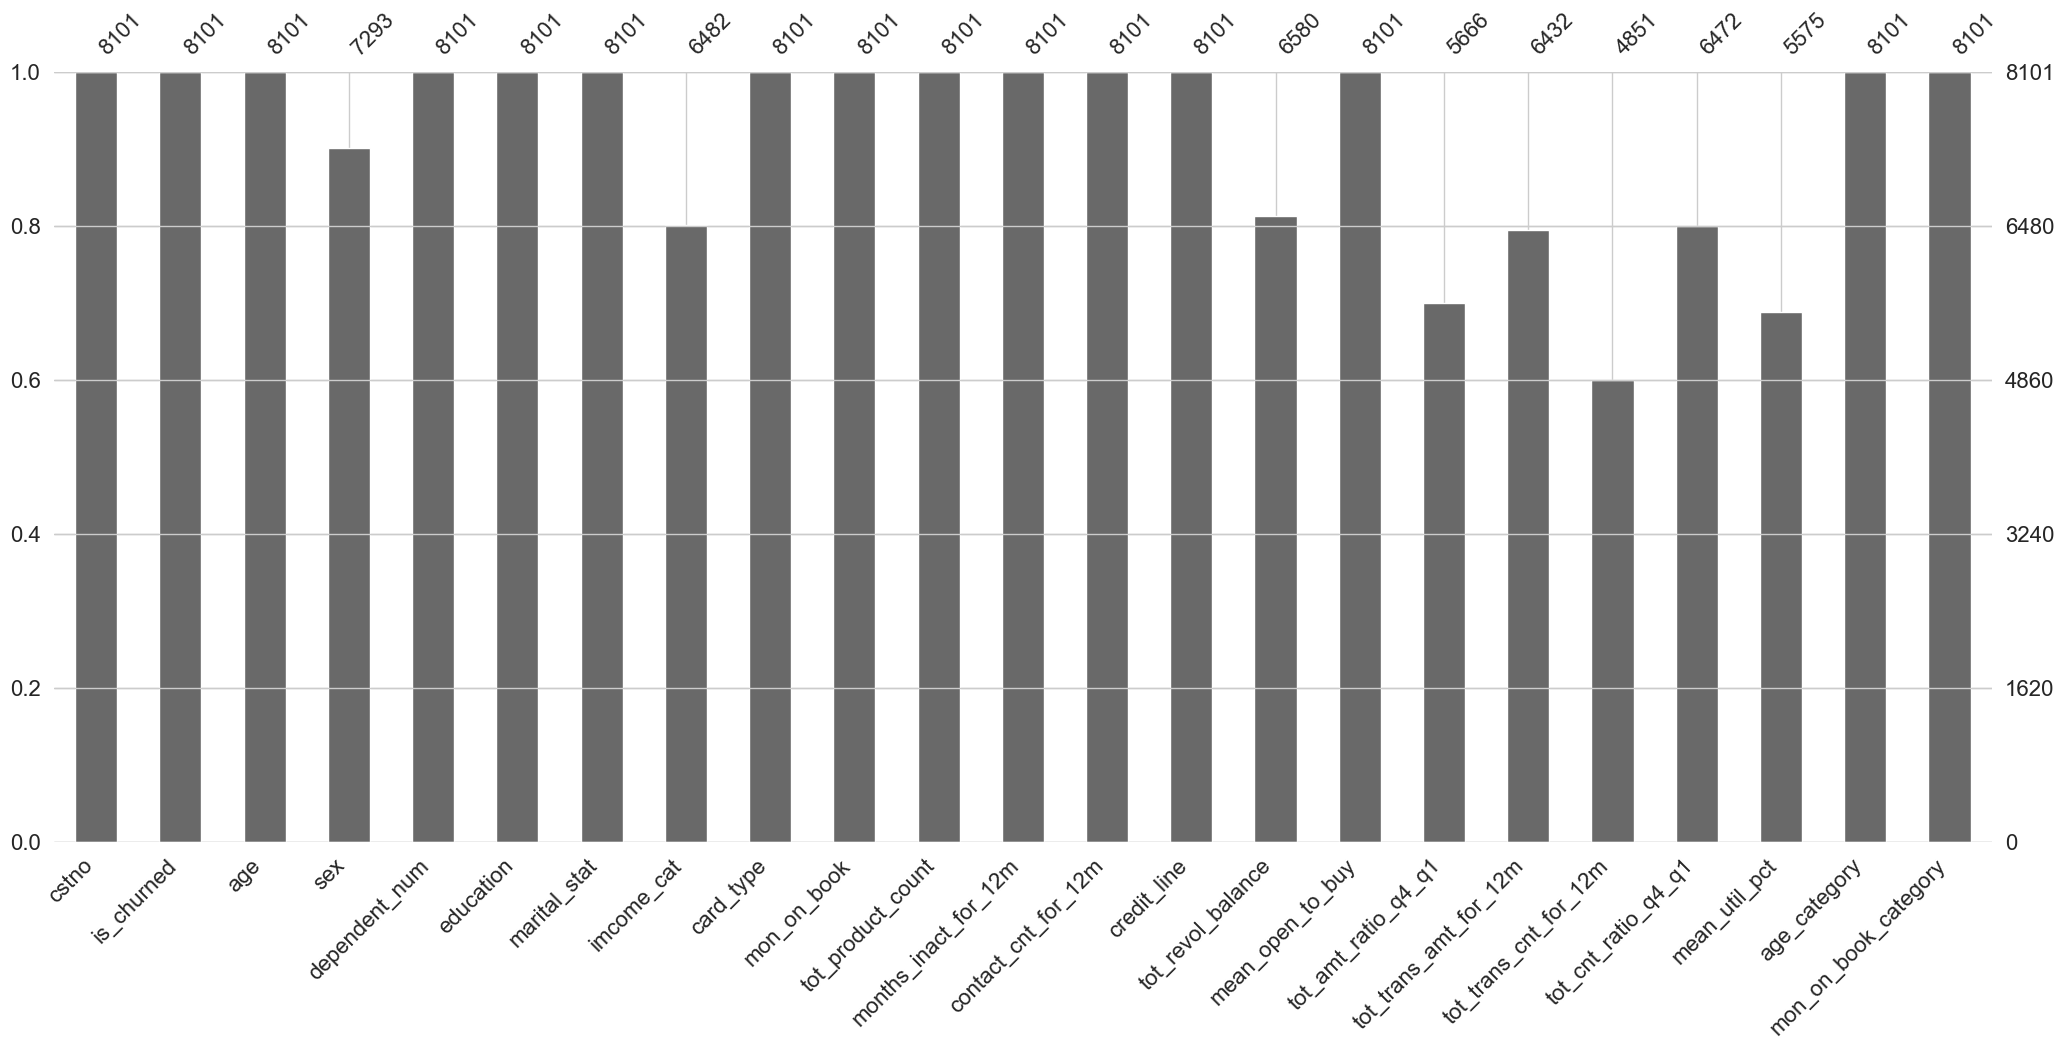

In [141]:
plt.figure(figsize=(24, 12))
msno.bar(bank_churner_df)
plt.show()

## Feature별 특징 확인

### is_churned : 이탈  여부
- 1 : 이탈, 0 : 유지

In [47]:
bank_churner_df["is_churned"].value_counts()

0    6801
1    1300
Name: is_churned, dtype: int64

<Axes: xlabel='is_churned', ylabel='count'>

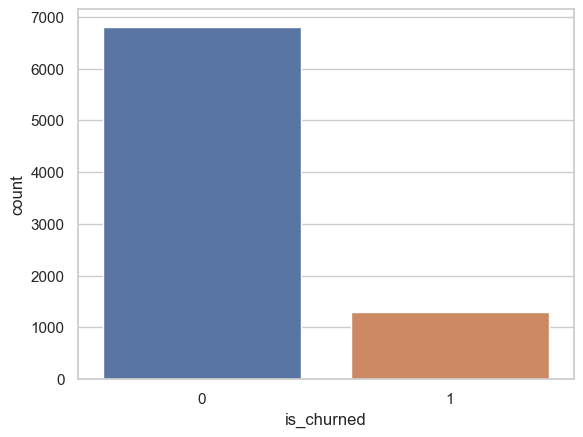

In [48]:
sns.countplot(x='is_churned', data=bank_churner_df)

### age : 나이

In [49]:
bank_churner_df["age"].describe()

count    8101.000000
mean       46.306382
std         8.022527
min        26.000000
25%        41.000000
50%        46.000000
75%        52.000000
max        70.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='count'>

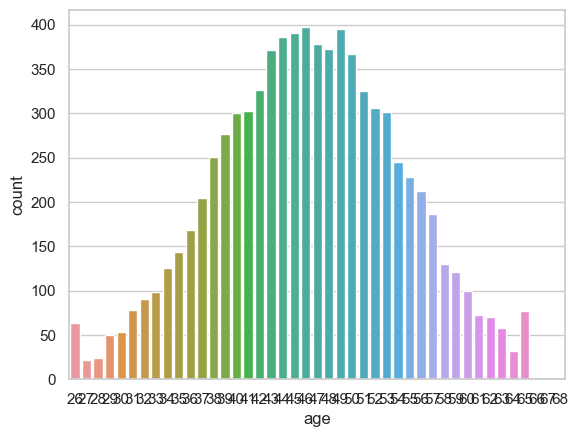

In [50]:
age_df = bank_churner_df[(bank_churner_df['age'] > 20) & (bank_churner_df['age'] < 70)][['age']]
age_df
sns.countplot(x='age', data=age_df)

In [51]:
# 나이를 나이대별로 범주화
def age_categorize(age):
    age = (age // 10) * 10
    return age

bank_churner_df['age_category'] = bank_churner_df.age.apply(age_categorize)
bank_churner_df['age_category']
    

0       40
1       50
2       40
3       30
4       40
        ..
8096    40
8097    50
8098    40
8099    50
8100    40
Name: age_category, Length: 8101, dtype: int64

<Axes: xlabel='age_category', ylabel='count'>

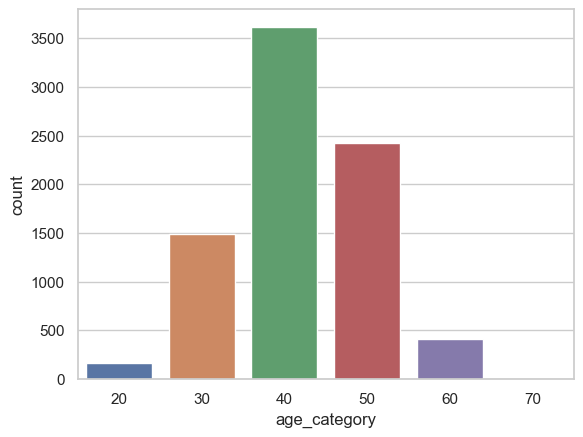

In [52]:
sns.countplot(x='age_category', data=bank_churner_df)

<Axes: xlabel='age_category', ylabel='count'>

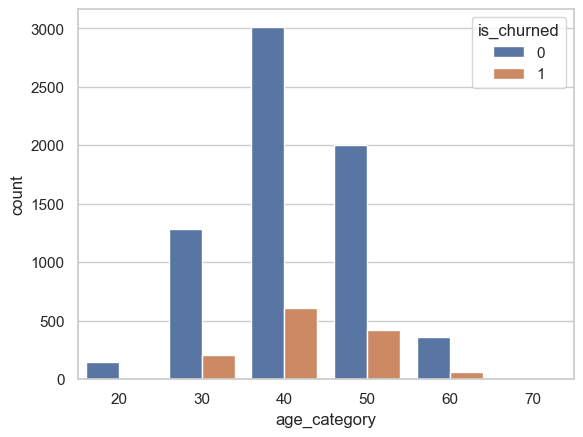

In [53]:
sns.countplot(x='age_category', data=bank_churner_df, hue='is_churned')

### sex : 성별

In [54]:
bank_churner_df['sex'].value_counts()

F    3840
M    3453
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

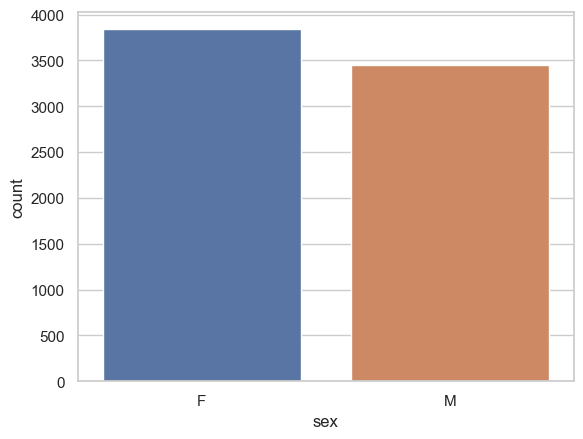

In [55]:
sns.countplot(x='sex', data=bank_churner_df)

<Axes: xlabel='sex', ylabel='count'>

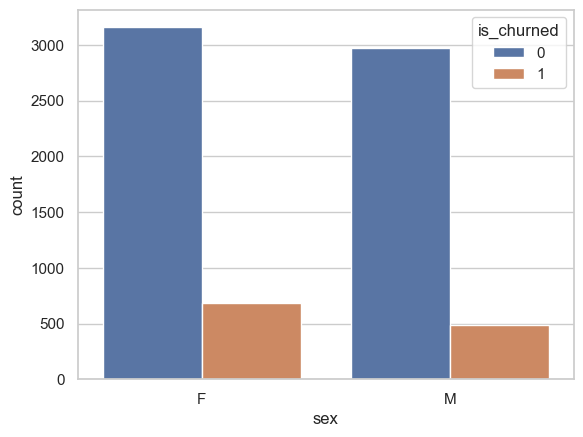

In [56]:
sns.countplot(x='sex', data=bank_churner_df, hue='is_churned')

### dependent_num : 부양가족수

In [57]:
bank_churner_df['dependent_num'].value_counts()

3    2222
2    2150
1    1465
4    1212
0     725
5     327
Name: dependent_num, dtype: int64

<Axes: xlabel='dependent_num', ylabel='count'>

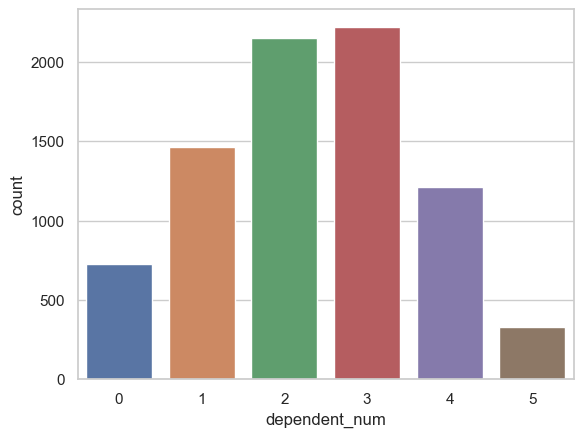

In [58]:
sns.countplot(x='dependent_num', data=bank_churner_df)

<Axes: xlabel='dependent_num', ylabel='count'>

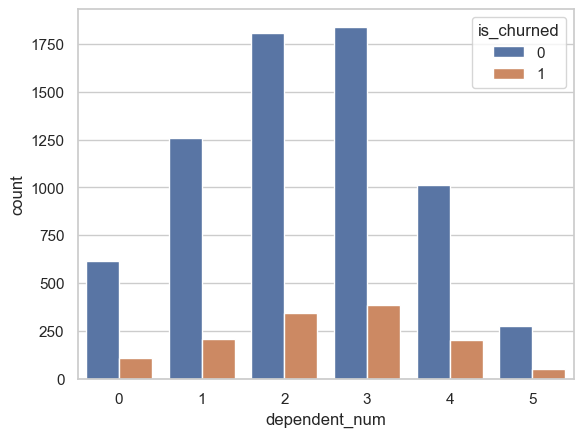

In [59]:
#sns.countplot(x='dependent_num', data=bank_churner_df, hue='is_churned', order = bank_churner_df['dependent_num'].value_counts().index)
sns.countplot(x='dependent_num', data=bank_churner_df, hue='is_churned')

### education : 교육수준
- Graduate : 대학원
- High School : 고졸
- Unknown
- Uneducated : 미교육
- College : 단과대학
- Post-Graduate : 보딩스쿨(재수)
- Doctorate :박사

In [60]:
bank_churner_df['education'].value_counts()

Graduate         2528
High School      1619
Unknown          1205
Uneducated       1171
College           816
Post-Graduate     407
Doctorate         355
Name: education, dtype: int64

<Axes: xlabel='education', ylabel='count'>

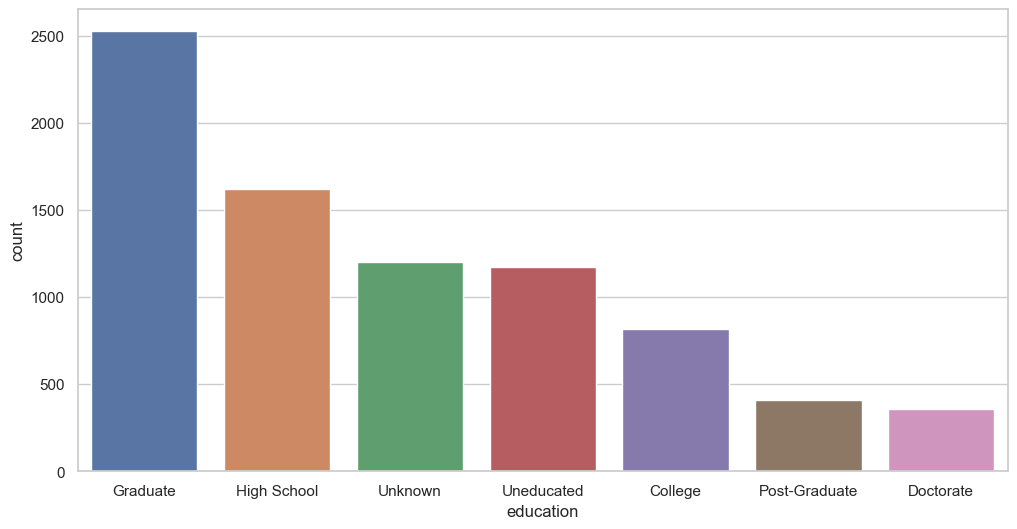

In [61]:
plt.figure(figsize=(12, 6))
sns.countplot(x='education', data=bank_churner_df, order = bank_churner_df['education'].value_counts().index)

<Axes: xlabel='education', ylabel='count'>

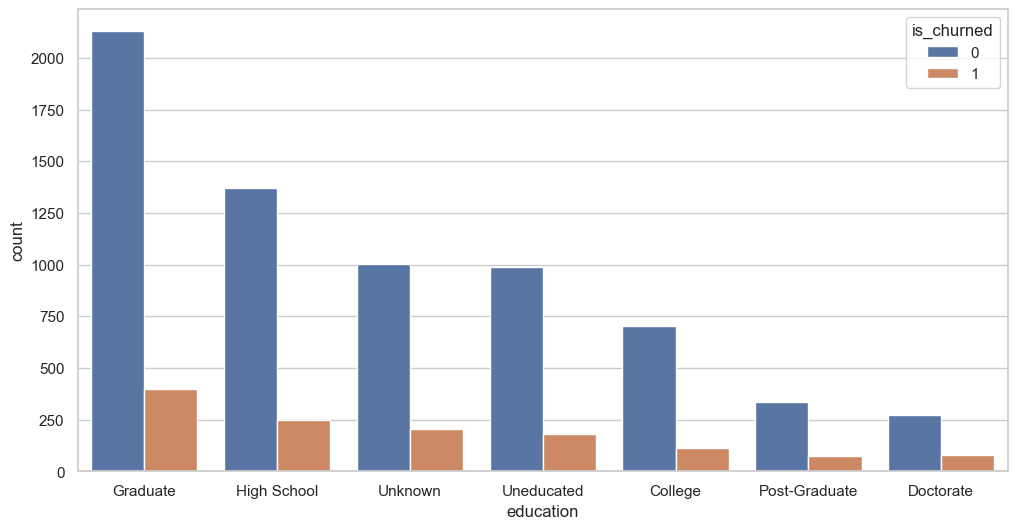

In [62]:
plt.figure(figsize=(12, 6))
#sns.countplot(x='education', data=bank_churner_df, hue='is_churned', order = bank_churner_df['education'].value_counts(ascending=True).index)
sns.countplot(x='education', data=bank_churner_df, hue='is_churned', order = bank_churner_df['education'].value_counts().index)

In [63]:
### marital_stat : 결혼상태
- Married  : 결혼
- Single   : 미혼
- Divorced : 이혼

SyntaxError: illegal target for annotation (512437623.py, line 2)

In [ ]:
bank_churner_df['marital_stat'].value_counts()

Married     3767
Single      3144
Divorced     611
Unknown      579
Name: marital_stat, dtype: int64

<Axes: xlabel='marital_stat', ylabel='count'>

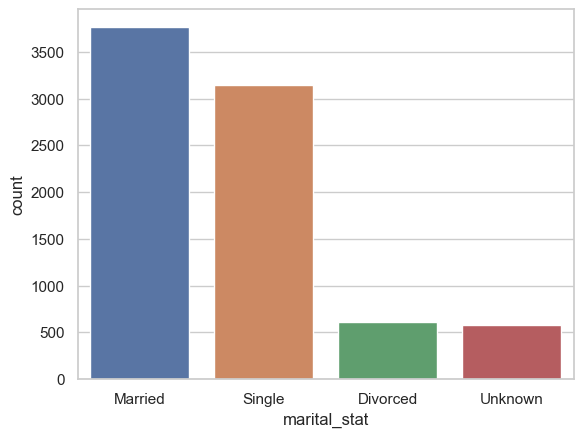

In [ ]:
sns.countplot(x='marital_stat', data=bank_churner_df)

<Axes: xlabel='marital_stat', ylabel='count'>

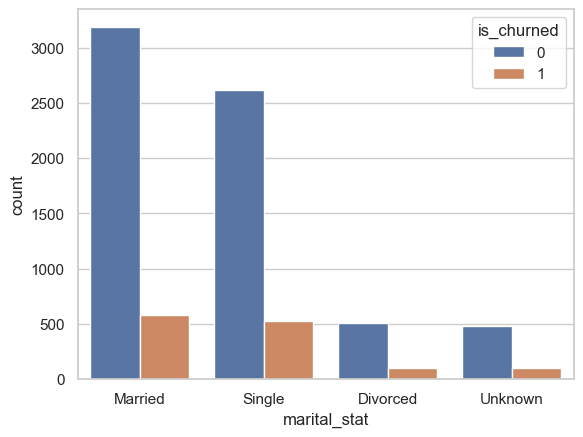

In [ ]:
sns.countplot(x='marital_stat', data=bank_churner_df, hue='is_churned')

### imcome_cat : 수입규모
- Less than $40K    2277
- $40K - $60K       1151
- $60K - $80K        891
- $80K - $120K       988
- $120K +            473
- Unknown            702


In [ ]:
bank_churner_df['imcome_cat'].value_counts()

Less than $40K    2277
$40K - $60K       1151
$80K - $120K       988
$60K - $80K        891
Unknown            702
$120K +            473
Name: imcome_cat, dtype: int64

<Axes: xlabel='imcome_cat', ylabel='count'>

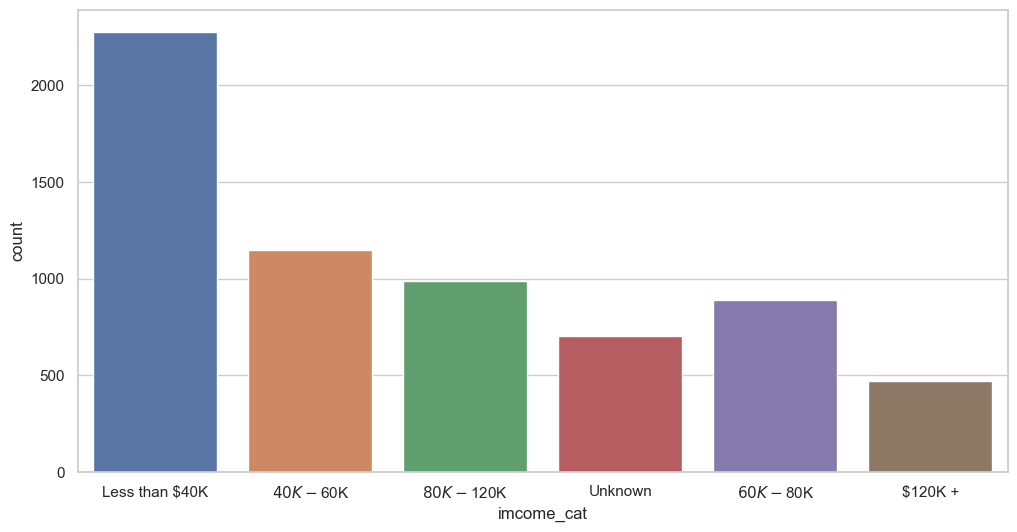

In [64]:
plt.figure(figsize=(12, 6))
sns.countplot(x='imcome_cat', data=bank_churner_df)

<Axes: xlabel='imcome_cat', ylabel='count'>

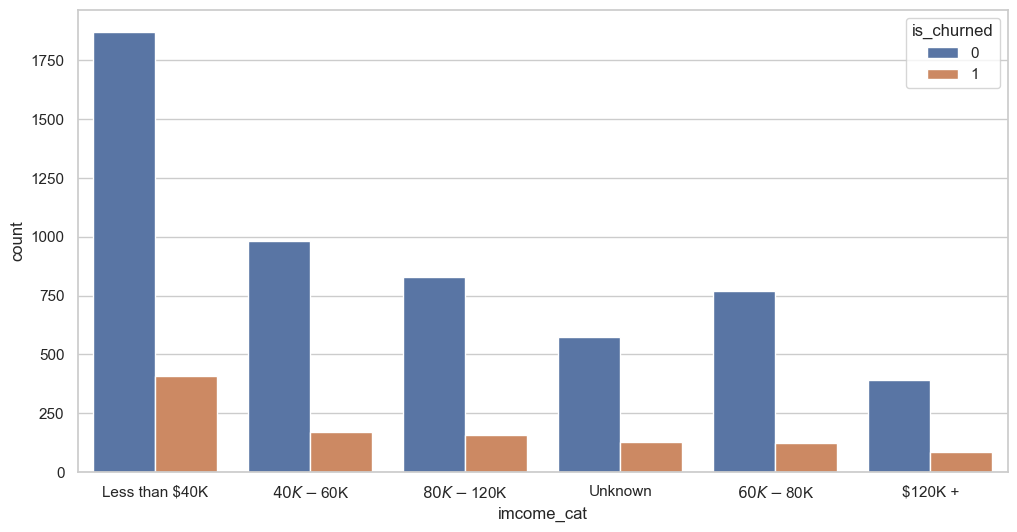

In [90]:
plt.figure(figsize=(12, 6))
sns.countplot(x='imcome_cat', data=bank_churner_df, hue='is_churned')

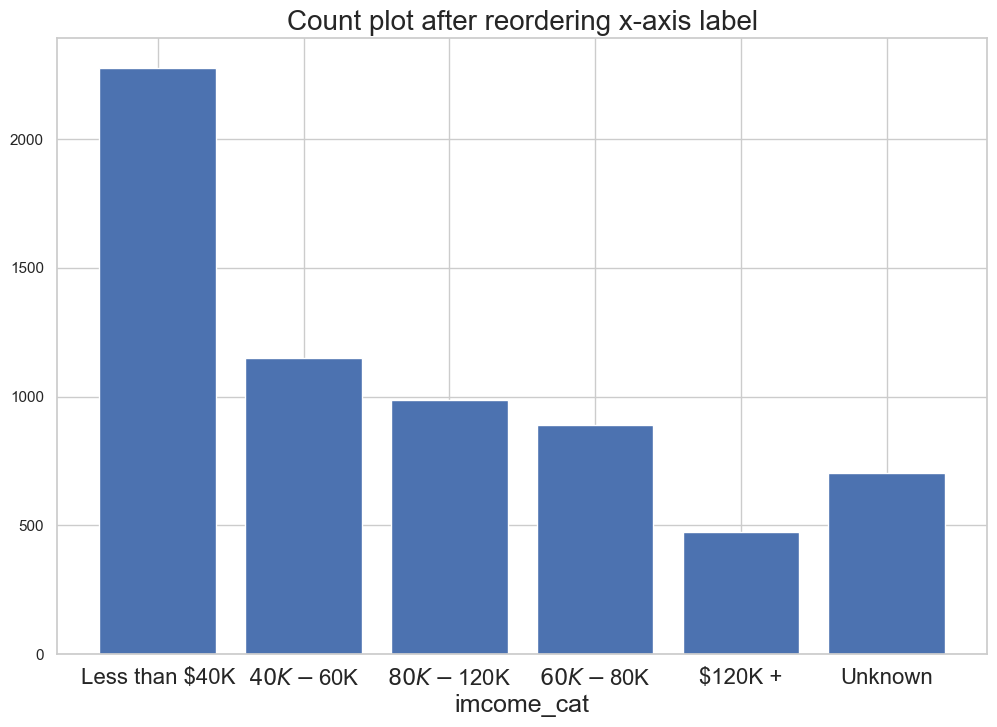

In [89]:
bank_churner_imcome_cat_df_agg = bank_churner_df.groupby('imcome_cat')[['imcome_cat']].count()

imcome_order = ['Less than $40K','$40K - $60K','$80K - $120K','$60K - $80K','$120K +','Unknown']
bank_churner_imcome_cat_df_agg=bank_churner_imcome_cat_df_agg.loc[imcome_order]
bank_churner_imcome_cat_df_agg

plt.figure(figsize=(12, 8))
plt.bar(df_agg.index, df_agg.imcome_cat)
plt.title("Count plot after reordering x-axis label", fontsize=20)
plt.xlabel("imcome_cat", fontsize=18)
plt.xticks(fontsize=16)
plt.show()


### card_type : 카드종류
- Blue       
- Silver     
- Gold       
- Platinum   

In [96]:
bank_churner_df[['card_type','is_churned']].value_counts()

card_type  is_churned
Blue       0             6338
           1             1219
Silver     0              376
Gold       0               77
Silver     1               60
Gold       1               16
Platinum   0               10
           1                5
dtype: int64

In [101]:
bank_churner_df.groupby(['card_type','is_churned'], as_index=False)['cstno'].count()

,card_type,is_churned,cstno
0,Blue,0,6338
1,Blue,1,1219
2,Gold,0,77
3,Gold,1,16
4,Platinum,0,10
5,Platinum,1,5
6,Silver,0,376
7,Silver,1,60


<Axes: xlabel='card_type', ylabel='count'>

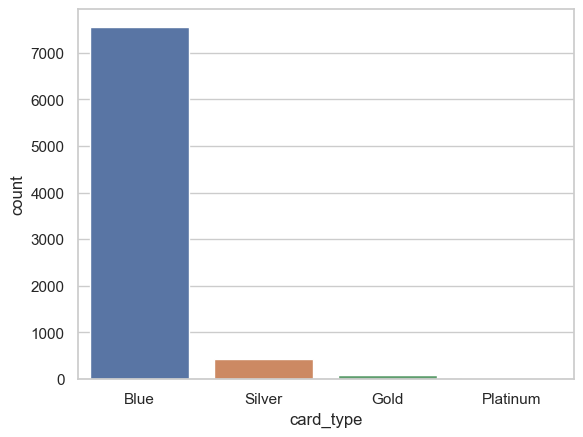

In [94]:
sns.countplot(x='card_type', data=bank_churner_df)

<Axes: xlabel='card_type', ylabel='count'>

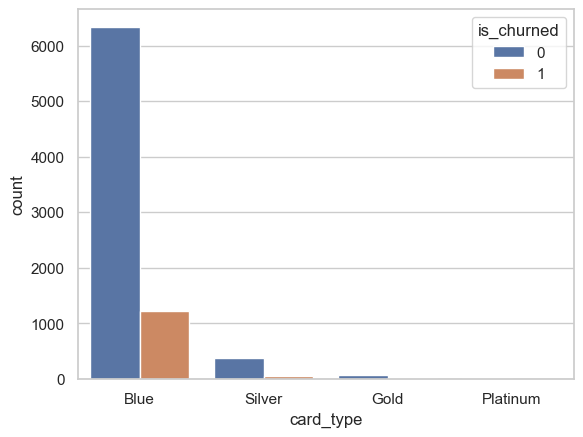

In [92]:
sns.countplot(x='card_type', data=bank_churner_df, hue='is_churned')

### mon_on_book : 은행 거래 기간 ???
- 은행 거래 개월 수

In [108]:
bank_churner_df['mon_on_book'].value_counts()
bank_churner_df['mon_on_book'].describe()

count    8101.000000
mean       35.923590
std         8.024359
min        13.000000
25%        31.000000
50%        36.000000
75%        40.000000
max        56.000000
Name: mon_on_book, dtype: float64

In [119]:
bank_churner_df['mon_on_book'].value_counts()

36    1950
37     276
39     276
38     274
40     269
34     267
35     256
31     255
33     250
41     243
32     241
30     230
28     230
43     212
42     210
29     192
45     187
44     187
27     172
46     155
26     144
47     139
25     133
48     133
24     125
49     114
23      95
50      87
22      83
56      78
21      71
51      64
53      63
20      63
13      57
19      54
52      52
18      46
54      43
55      33
17      31
15      28
16      20
14      13
Name: mon_on_book, dtype: int64

In [ ]:
# 은행 거래 기간 변환
# 30대, 40대, 50대
 
def calcUseMonth(mon_on_book):
    mon_on_book = (mon_on_book // 10) * 10
    return mon_on_book


bank_churner_df['mon_on_book_category'] = bank_churner_df.mon_on_book.apply(calcUseMonth)


<Axes: xlabel='mon_on_book_category', ylabel='count'>

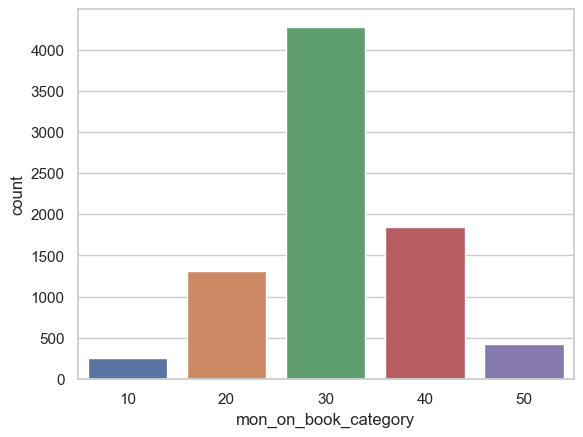

In [120]:
sns.countplot(x='mon_on_book_category', data=bank_churner_df)

<Axes: xlabel='mon_on_book_category', ylabel='count'>

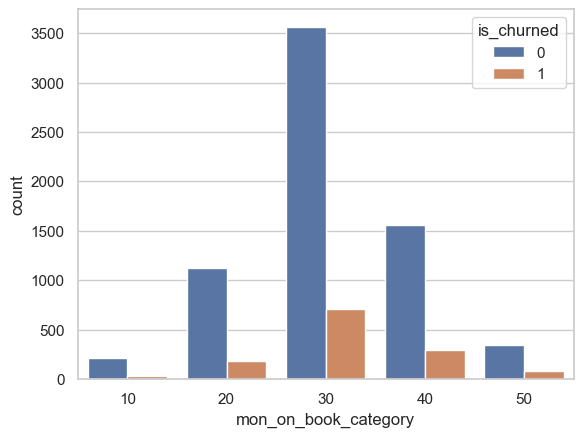

In [121]:
sns.countplot(x='mon_on_book_category', data=bank_churner_df, hue='is_churned')

### tot_product_count : 현재 보유 상품 개수

In [122]:
bank_churner_df['tot_product_count'].value_counts()

3    1852
4    1539
5    1511
6    1488
2     985
1     726
Name: tot_product_count, dtype: int64

<Axes: xlabel='tot_product_count', ylabel='count'>

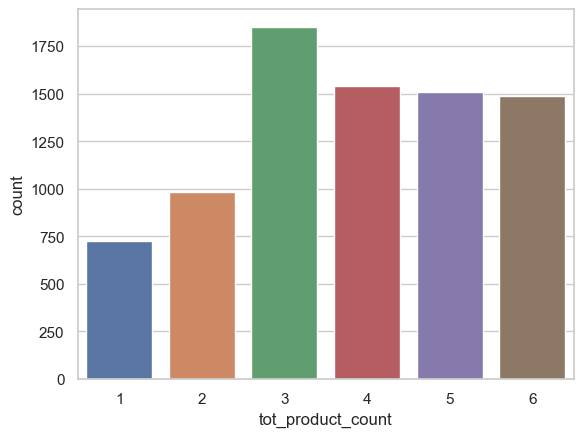

In [123]:
sns.countplot(x='tot_product_count', data=bank_churner_df)

<Axes: xlabel='tot_product_count', ylabel='count'>

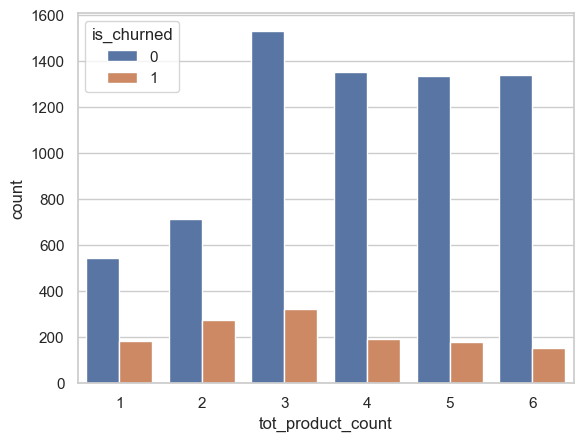

In [125]:
sns.countplot(x='tot_product_count', data=bank_churner_df, hue='is_churned')

## 보유 카드 갯수에 따라 이탈율이 다르므로 상품 갯수별 이탈률 확인할 필요 있음

### months_inact_for_12m : 최근 12개월 동안 카드 거래가 없었던 개월 수

In [127]:
bank_churner_df['months_inact_for_12m'].value_counts()

3    3094
2    2611
1    1780
4     346
5     144
6     104
0      22
Name: months_inact_for_12m, dtype: int64

<Axes: xlabel='months_inact_for_12m', ylabel='count'>

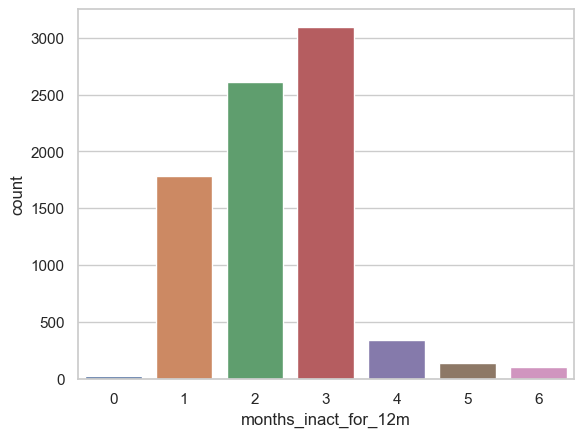

In [128]:
sns.countplot(x='months_inact_for_12m', data=bank_churner_df)

<Axes: xlabel='months_inact_for_12m', ylabel='count'>

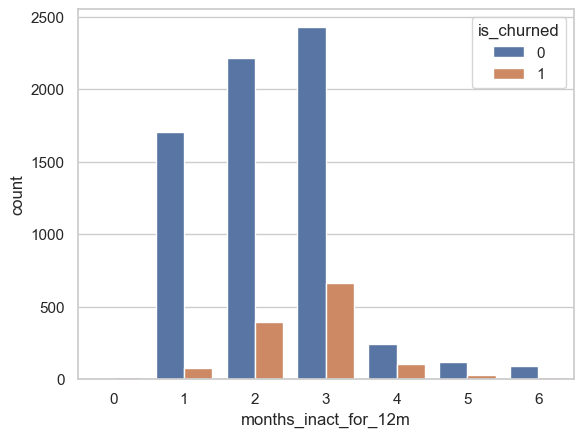

In [129]:
sns.countplot(x='months_inact_for_12m', data=bank_churner_df, hue='is_churned')

# 세부 분석 할 필요가 있음

### contact_cnt_for_12m : 최근 12개월 동안 연락 횟수

In [131]:
bank_churner_df['contact_cnt_for_12m'].value_counts()

3    2716
2    2596
1    1207
4    1092
0     312
5     133
6      45
Name: contact_cnt_for_12m, dtype: int64

<Axes: xlabel='contact_cnt_for_12m', ylabel='count'>

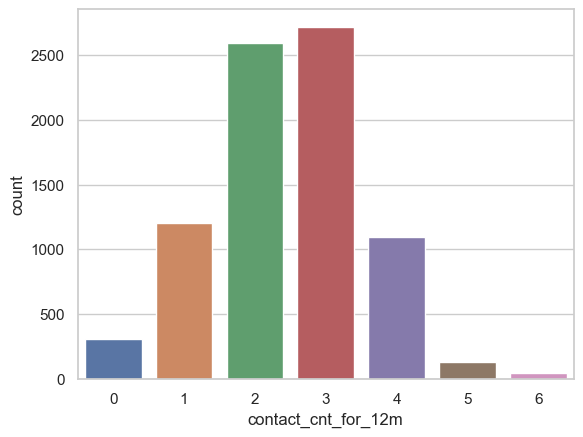

In [132]:
sns.countplot(x='contact_cnt_for_12m', data=bank_churner_df)

<Axes: xlabel='contact_cnt_for_12m', ylabel='count'>

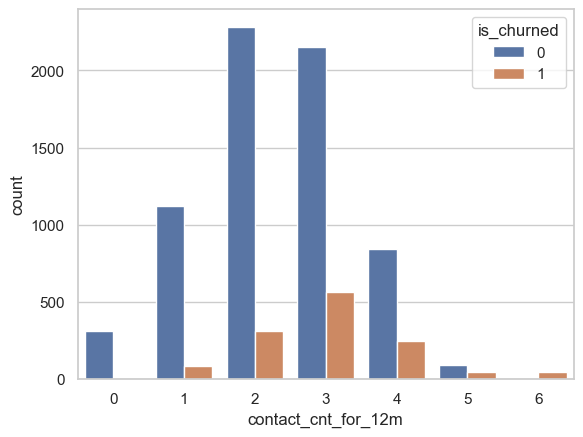

In [133]:
sns.countplot(x='contact_cnt_for_12m', data=bank_churner_df, hue='is_churned')

# 세부적으로 이탈율 분석 필요해 보임

### credit_line : 카드 한도

In [134]:
bank_churner_df['credit_line'].value_counts()

1438.3     413
34516.0    399
9959.0      15
15987.0     14
23981.0      9
          ... 
18177.0      1
32024.0      1
6551.0       1
11077.0      1
2951.0       1
Name: credit_line, Length: 5325, dtype: int64

In [135]:
bank_churner_df['credit_line'].describe()

count     8101.000000
mean      8636.548068
std       9086.419557
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11128.000000
max      34516.000000
Name: credit_line, dtype: float64

<Axes: title={'center': '카드 이탈 여부별 한도별 분포'}, xlabel='credit_line', ylabel='Count'>

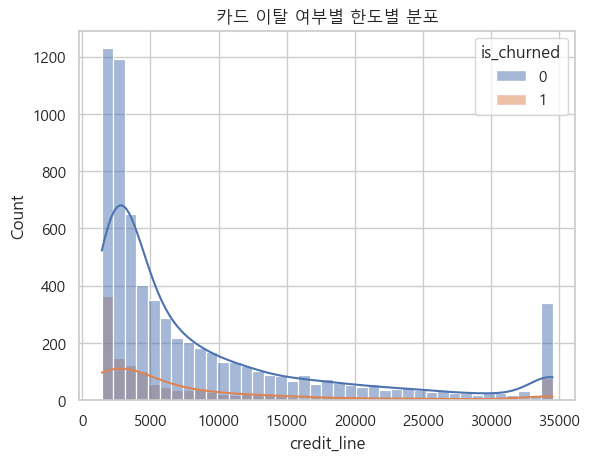

In [149]:
plt.title('카드 이탈 여부별 한도별 분포')
sns.histplot(x='credit_line', data=bank_churner_df, kde=True, hue='is_churned')

<Axes: title={'center': '카드 이탈 여부별 한도별 분포'}, xlabel='credit_line_cagegory', ylabel='Count'>

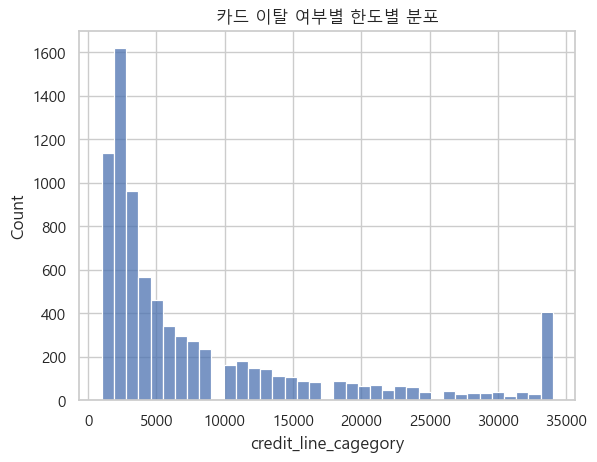

In [169]:
def calcCreditLine(credit_line):
    credit_line = (credit_line // 1000) * 1000
    return credit_line

#df[['credit_line_category']] = bank_churner_df.credit_line.apply(calcCreditLine)
df = pd.DataFrame()
df['credit_line_cagegory'] = bank_churner_df.credit_line.apply(calcCreditLine)

plt.title('카드 이탈 여부별 한도별 분포')
sns.histplot(x='credit_line_cagegory', data=df)